In [1]:
import numpy as np
from cued_sf2_lab.jpeg import diagscan

In [79]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import IPython.display
import numpy as np
from cued_sf2_lab.familiarisation import load_mat_img, plot_image
from cued_sf2_lab.laplacian_pyramid import quantise

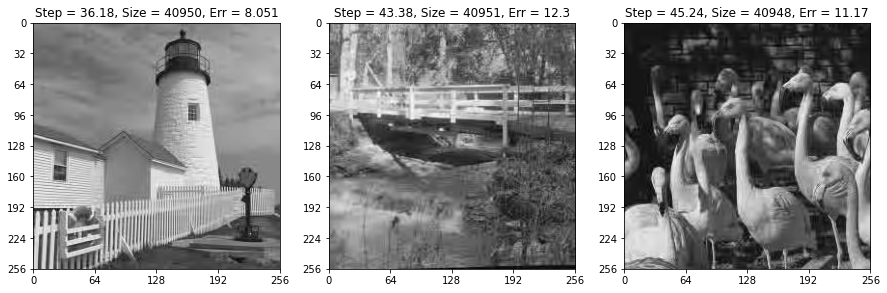

In [138]:
from compression import LBTCompression

fig, axs = plt.subplots(1, 3, figsize=(15, 6))

lighthouse, _ = load_mat_img(img='lighthouse.mat', img_info='X')
bridge, _ = load_mat_img(img='bridge.mat', img_info='X')
flamingo, _ = load_mat_img(img='flamingo.mat', img_info='X')

for i, image in enumerate([lighthouse, bridge, flamingo]):

    image = image - 128.0

    L = LBTCompression()

    Y = L.compress(image)
    (Z, h), qs = L.opt_encode(Y, size_lim=40950)
    Y = L.decode(Z, qs)
    X = L.decompress(Y)
    plot_image(X, ax=axs[i])
    axs[i].set(title=f'Step = {qs:.4}, Size = {Z[:, 1].sum()}, Err = {np.std(image - X):.4}')


In [96]:
from cued_sf2_lab.jpeg import jpegenc, jpegdec